In [6]:
import torch
from torch.autograd import Variable
from model.acgan import _netG_CIFAR10
import os
import torchvision
import argparse

os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2,3'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
DATA = 'CIFAR'  # Choices: ['CIFAR', 'ImageNet', 'RestrictedImageNet']
WORKERS=2

batch_size=100 #应设置batchsize大小，使数据集大小为其倍数

n_gpu=4
data_root='/data/zyh/data/'
out_dir='./output/acgan/'
netG='./output/acgan/model/train_time:3/netG_epoch_200.pth'
gen_time=5
save_path='./output/acgan/gen_time:{}/'

nz=100

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
save_path = save_path.format(gen_time)

if not os.path.exists(save_path):
    os.mkdir(save_path)
    for i in range(10):
        os.mkdir(os.path.join(save_path, str(i)))

In [5]:
noise = torch.FloatTensor(batch_size, nz).cuda()
noise = Variable(noise)
labels = torch.arange(0, 10, dtype=torch.long, device=device)

In [7]:
generator = _netG_CIFAR10(n_gpu, nz)
generator.load_state_dict(torch.load(netG))
generator.cuda()

_netG_CIFAR10(
  (fc1): Linear(in_features=100, out_features=384, bias=True)
  (tconv2): Sequential(
    (0): ConvTranspose2d(384, 192, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (tconv3): Sequential(
    (0): ConvTranspose2d(192, 96, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (tconv4): Sequential(
    (0): ConvTranspose2d(96, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (tconv5): Sequential(
    (0): ConvTranspose2d(48, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): Tanh()
  )
  (embedding): Embedding(10, 100)
)

In [ ]:
for k in range(5000):
    noise = noise.normal_(0, 1)
    images = generator(noise.cuda(), labels)
    images = images / 2 +  0.5
    for i in range(0, 10):
        torchvision.utils.save_image(images[i], os.path.join(save_path, str(i), str(k) + '.png'))

# show imgs

In [1]:
import torch
from torch.autograd import Variable
from model.acgan import _netG_CIFAR10
import os
import torchvision
import argparse

os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2,3'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
from robustness.tools.vis_tools import show_image_row, show_image_column
%matplotlib inline

cuda


In [2]:
DATA = 'CIFAR'  # Choices: ['CIFAR', 'ImageNet', 'RestrictedImageNet']
WORKERS=2

batch_size=10 #应设置batchsize大小，使数据集大小为其倍数
netG='./output/acgan/model/train_time:3/netG_epoch_200.pth'

n_gpu=4
nz=100

In [3]:
generator = _netG_CIFAR10(n_gpu, nz)
generator.load_state_dict(torch.load(netG))
generator.cuda()

_netG_CIFAR10(
  (fc1): Linear(in_features=100, out_features=384, bias=True)
  (tconv2): Sequential(
    (0): ConvTranspose2d(384, 192, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (tconv3): Sequential(
    (0): ConvTranspose2d(192, 96, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (tconv4): Sequential(
    (0): ConvTranspose2d(96, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (tconv5): Sequential(
    (0): ConvTranspose2d(48, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): Tanh()
  )
  (embedding): Embedding(10, 100)
)

In [4]:
noise = torch.FloatTensor(batch_size, nz)
noise = Variable(noise)
labels = torch.arange(0, 10, dtype=torch.long, device=device)

In [5]:
noise.shape

torch.Size([10, 100])

In [6]:
noise = noise.normal_(0, 1)
images = generator(noise.cuda(), labels)
images = images / 2 +  0.5

/home/fhz_11821062/jupyternbook/zyh/dataset-generation/model/acgan.py:185: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_embedding = self.embedding(torch.tensor(label).cuda())


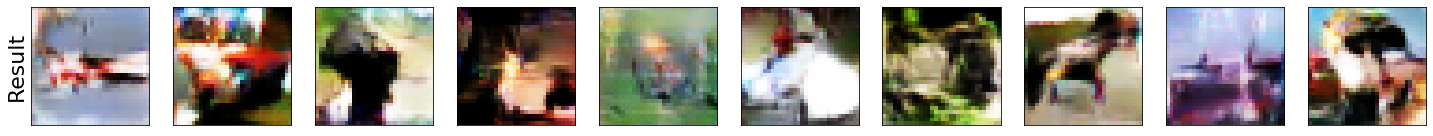

In [7]:
# Visualize inversion
show_image_row([ images.detach().cpu()], 
               [ "Result"], 
               fontsize=22)